In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(r"C:\Users\chava\Desktop\heart_disease_prediction.csv")
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,No,0.0,Up,Absence
1,49,F,NAP,160,180,Normal,156,No,1.0,Flat,Presence
2,37,M,ATA,130,283,ST,98,No,0.0,Up,Absence
3,48,F,ASY,138,214,Normal,108,Yes,1.5,Flat,Presence
4,54,M,NAP,150,195,Normal,122,No,0.0,Up,Absence
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,No,1.2,Flat,Presence
914,68,M,ASY,144,193,Normal,141,No,3.4,Flat,Presence
915,57,M,ASY,130,131,Normal,115,Yes,1.2,Flat,Presence
916,57,F,ATA,130,236,LVH,174,No,0.0,Flat,Presence


# EDA process part in Dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    object 
 4   Cholesterol     918 non-null    object 
 5   RestingECG      918 non-null    object 
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    object 
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 79.0+ KB


#### need to count target column values, for our data set good or not

In [3]:
df['HeartDisease'].value_counts()

Presence    508
Absence     410
Name: HeartDisease, dtype: int64

#### i found ? in RestingBP and Cholesterol column, so i replace the ? with NAN because pandas and sklearn only handle NaN values

In [4]:
df["RestingBP"].replace("?", np.nan, inplace=True)
df["Cholesterol"].replace("?", np.nan, inplace=True)

#### change the datatype because in the latest steps we need to get mean value of RestingBP and Cholesterol column

In [5]:
 df["RestingBP"] = df["RestingBP"].astype("float64")
df["Cholesterol"] = df["Cholesterol"].astype("float64")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       910 non-null    float64
 4   Cholesterol     911 non-null    float64
 5   RestingECG      918 non-null    object 
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    object 
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 79.0+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,910.000000,911.000000,918.000000,918.000000
mean,53.510893,132.400000,198.656422,136.809368,0.887364
std,9.432617,18.562723,109.753487,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,172.500000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


<AxesSubplot:xlabel='RestingBP'>

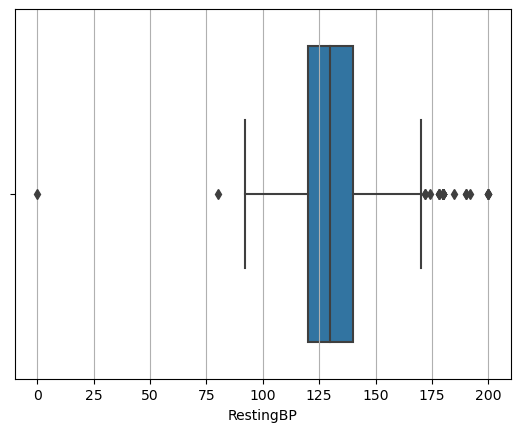

In [8]:
plt.grid()
sns.boxplot(df["RestingBP"])

#### from describe i found that RestingBP has min 0 value, but RestingBP must be greater than zero,so i need to 1st replace 0 value with NAN and then again NAN repalce with mean of RestingBP

In [9]:
df["RestingBP"].replace(0, np.nan, inplace=True)

In [10]:
df["RestingBP"].replace(np.nan,df["RestingBP"].mean(),inplace=True)

<AxesSubplot:xlabel='Cholesterol'>

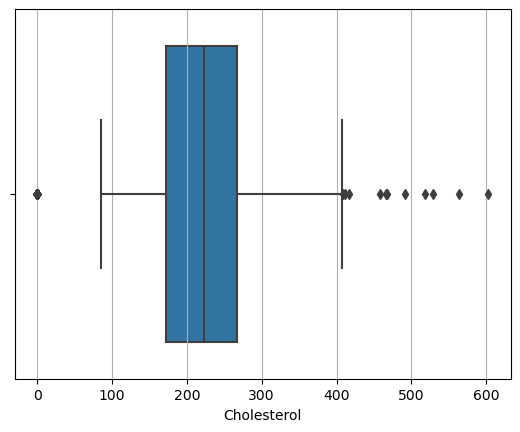

In [11]:
plt.grid()
sns.boxplot(df["Cholesterol"])

In [12]:
df[(df['Cholesterol']==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115.0,0.0,Normal,93,Yes,0.0,Flat,Presence
294,32,M,TA,95.0,0.0,Normal,127,No,0.7,Up,Presence
295,61,M,ASY,105.0,0.0,Normal,110,Yes,1.5,Up,Presence
296,50,M,ASY,145.0,0.0,Normal,139,Yes,0.7,Flat,Presence
297,57,M,ASY,110.0,0.0,ST,131,Yes,1.4,Up,Presence
...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122.0,0.0,Normal,120,No,0.5,Up,Presence
515,63,M,NAP,130.0,0.0,ST,160,No,3.0,Flat,Absence
518,48,M,NAP,102.0,0.0,ST,110,Yes,1.0,Down,Presence
535,56,M,ASY,130.0,0.0,LVH,122,Yes,1.0,Flat,Presence


#### in Cholesterol i found that 172 rows 0 value,Cholesterol must be greater than zero
#### so 1st i need to replace this 0 value with NAN and then replace NAN value with Cholesterol mean value

In [13]:
df["Cholesterol"].replace(0, np.nan, inplace=True)

In [14]:
df["Cholesterol"].replace(np.nan,df["Cholesterol"].mean(),inplace=True)

In [15]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.545655,244.893099,136.809368,0.887364
std,9.432617,17.956368,53.186105,25.460334,1.066570
min,28.000000,80.000000,85.000000,60.000000,-2.600000
25%,47.000000,120.000000,215.000000,120.000000,0.000000
50%,54.000000,130.000000,244.893099,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


#### in oldpeak column positive and negative value between -2.60 to 6.20, so we need to scaling this column

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Oldpeak']] = scaler.fit_transform(df[['Oldpeak']])


In [17]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,9.180000e+02
mean,53.510893,132.545655,244.893099,136.809368,-2.024524e-16
std,9.432617,17.956368,53.186105,25.460334,1.000545e+00
min,28.000000,80.000000,85.000000,60.000000,-3.271482e+00
25%,47.000000,120.000000,215.000000,120.000000,-8.324324e-01
50%,54.000000,130.000000,244.893099,138.000000,-2.695748e-01
75%,60.000000,140.000000,267.000000,156.000000,5.747115e-01
max,77.000000,200.000000,603.000000,202.000000,4.983762e+00


#### now our dataframe EDA part finished, so we can start data visualization 

# data visualization in dataset

#### data visualization for numerical dataset

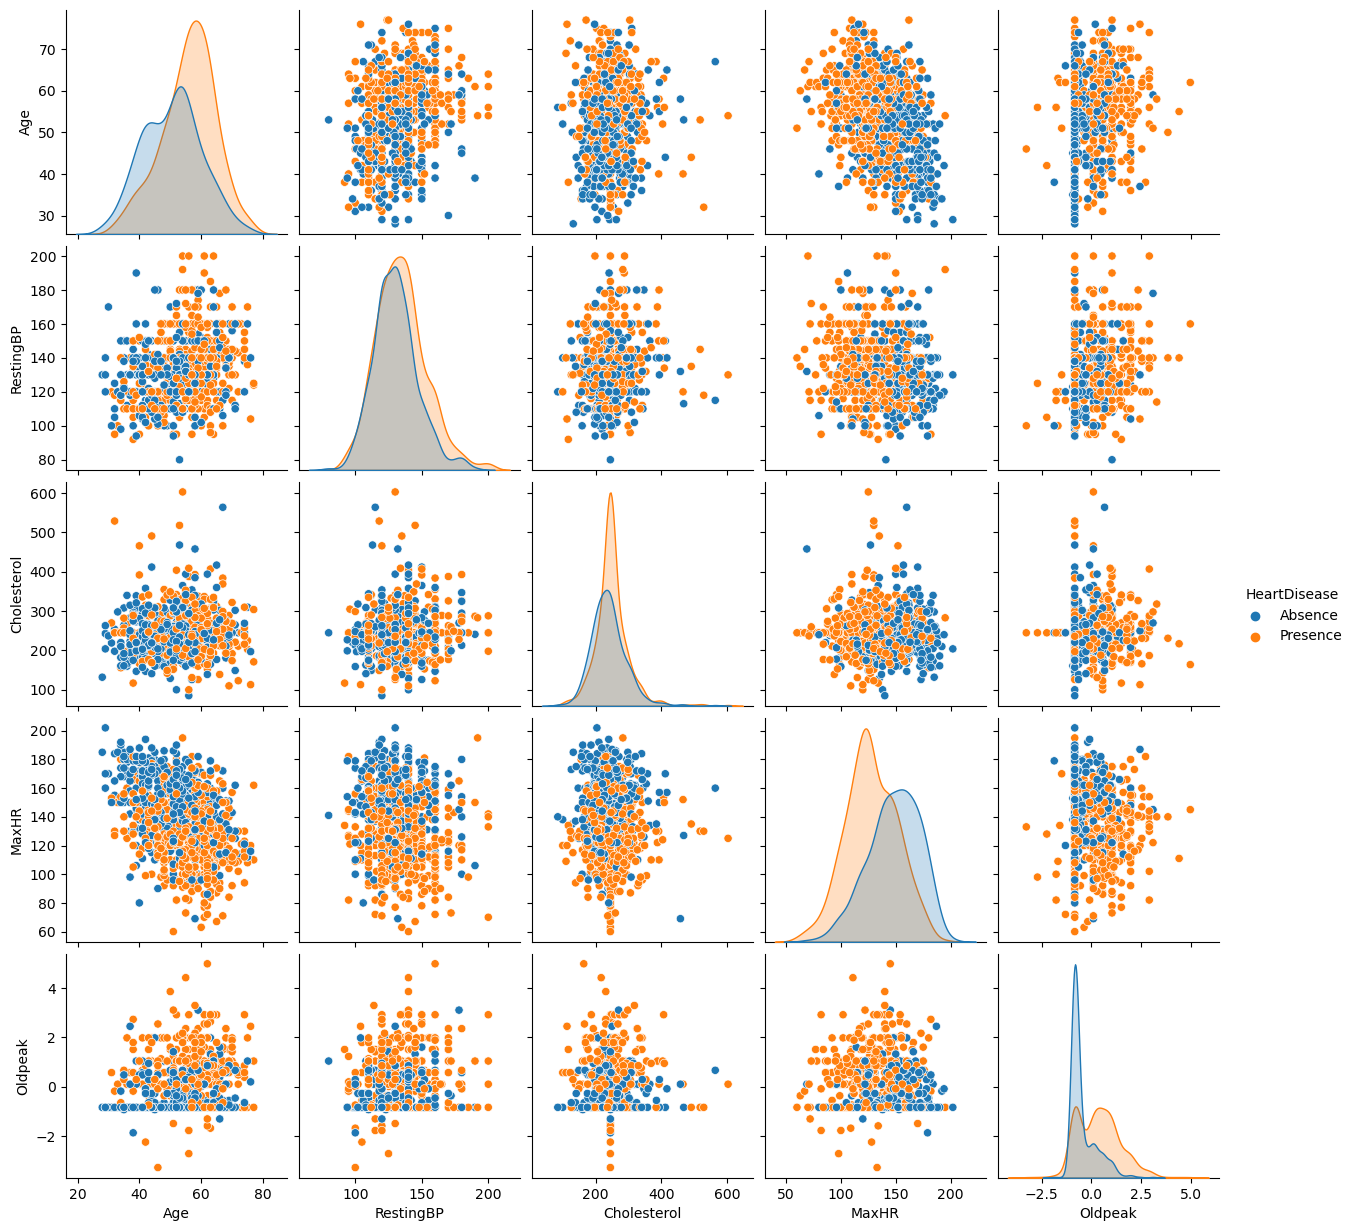

In [18]:
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease')
plt.show()

#### data visualization for categorical dataset

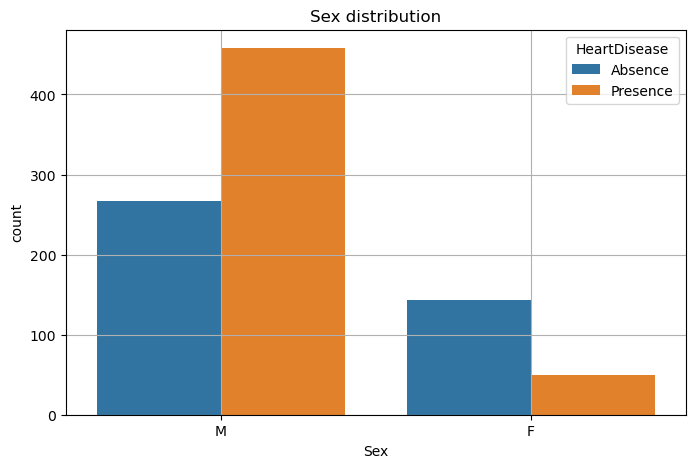

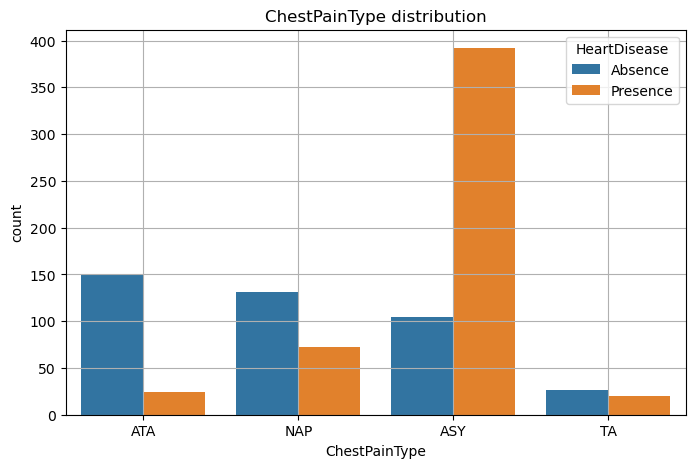

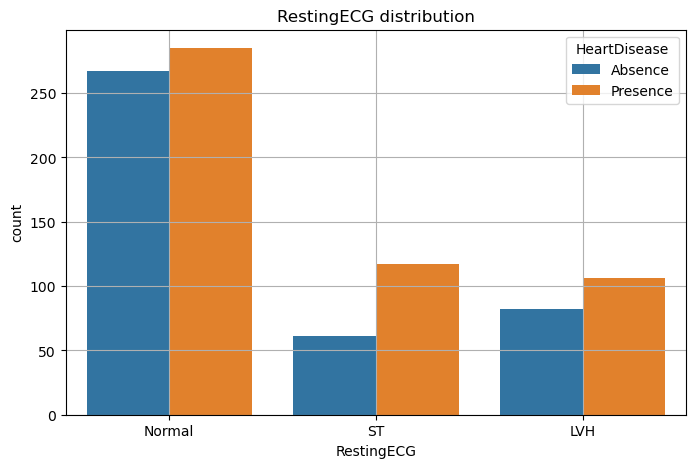

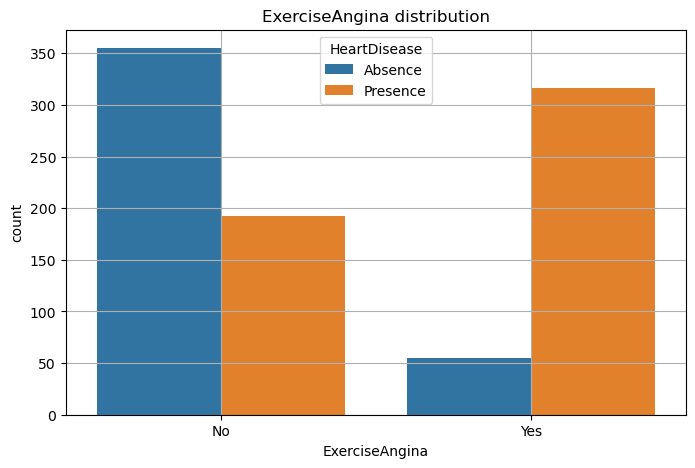

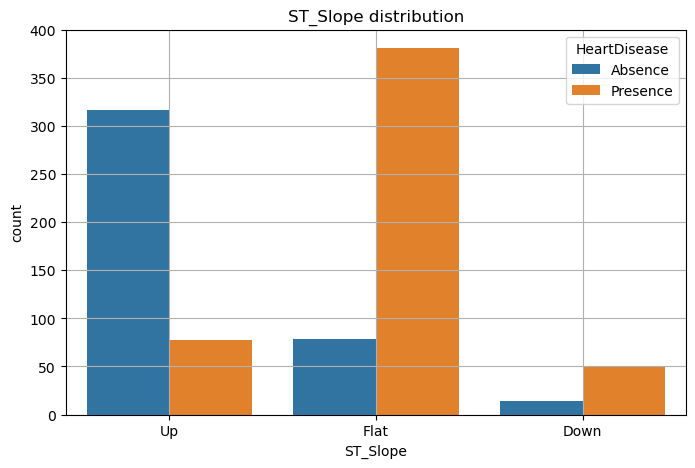

In [19]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='HeartDisease', data=df)
    plt.title(f'{column} distribution')
    plt.grid()
    plt.show()

#### (1)from above 1st male and female bar chart i can conclusion that male Heart disease presence 63% and female 25% meance heart disease presence percentage in male greater than female

#### (2) from above 2nd bar chart ChestPainType i can conclusion that Heart disease presence in ASY (asymptomatic) 79%,ATA (atypical angina) 13%,NAP(non-anginal pain) 35%,TA(truncus arteriosus) 43% meance ASY most important role in heart disease presence

#### (3)above 4th bar graph ExerciseAngina i can conclusion that heart disease presence due to doing exercise 85% and not doing exercise 35% meance due to Exercise heart disease increase

#### (4) above 4th bar graph ST Slope i can conclusion that Heart disease presence in up 19% ,flat 82% and down 77% meance the ST segment shift relative to exercise-induced increments in heart rate and flat slope increase heart disease presence percentage

# Machine Learning with Logistic Regression  

#### import important libraries for logistic regression

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Preprocessing: Convert categorical variables to numerical

In [21]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

#### Separate features (X) and target variable (y) 

In [22]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

#### Split the data into training and testing sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Initialize and train the logistic regression model

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Make predictions on the test set

In [25]:
y_pred = model.predict(X_test)

#### Evaluate the model

In [26]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [27]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8260869565217391
Confusion Matrix:
[[68  9]
 [23 84]]
Classification Report:
              precision    recall  f1-score   support

     Absence       0.75      0.88      0.81        77
    Presence       0.90      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184



# Machine Learning with DecisionTreeClassifier 

#### import important libraries for DecisionTreeClassifier

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Preprocessing: Convert categorical variables to numerical

In [29]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

#### Separate features (X) and target variable (y)

In [30]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

#### Split the data into training and testing sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Initialize and train the decision tree model

In [32]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

#### Make predictions on the test set

In [33]:
y_pred = model.predict(X_test)

#### Evaluate the model

In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8478260869565217
Confusion Matrix:
[[69  8]
 [20 87]]
Classification Report:
              precision    recall  f1-score   support

     Absence       0.78      0.90      0.83        77
    Presence       0.92      0.81      0.86       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



# Machine Learning with SVC

#### import important libraries for SVC

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Preprocessing: Convert categorical variables to numerical

In [39]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

#### Separate features (X) and target variable (y)

In [40]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

#### Split the data into training and testing sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardize the features (SVMs are sensitive to feature scaling)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Initialize and train the SVM model

In [43]:
model = SVC(C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

#### Make predictions on the test set

In [44]:
y_pred = model.predict(X_test)

#### Evaluate the model

In [45]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8369565217391305
Confusion Matrix:
[[64 13]
 [17 90]]
Classification Report:
              precision    recall  f1-score   support

     Absence       0.79      0.83      0.81        77
    Presence       0.87      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

